In [36]:
from tqdm import tqdm
name_list = []
for i in tqdm(range(len(df))):
    name_1 = df.loc[i]["제작사_x"]
    name_2 = df.loc[i]["제작사_y"]
    if name_1 != name_2:
        name_list.append(i)

print(len(name_list))    

100%|██████████| 17466/17466 [00:12<00:00, 1382.30it/s]

11828


#   영화 관객수는 어떤것에 영향을 받나

### 패키지

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus']= False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

- 제작사 날린이유: 너무많아서

In [124]:
df = pd.read_excel('../data/영화개봉.xlsx')
df.columns  = ['순번', '영화명', '감독', '제작사', '수입사', '배급사', '개봉일', '영화유형', '영화형태', '국적',
       '스크린수', '매출액', '관객수', '매출액_서울', '관객수_서울', '장르', '등급', '영화구분']
df = df[['영화명', '감독', '개봉일', '영화유형', '영화형태', '국적','스크린수', '매출액', '관객수', '등급', '영화구분']]
df = df.drop(index=0).reset_index(drop=True)
print(df.shape)
print(df.info())
df.head(3)

(16785, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16785 entries, 0 to 16784
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   영화명     16785 non-null  object        
 1   감독      16100 non-null  object        
 2   개봉일     16775 non-null  datetime64[ns]
 3   영화유형    16785 non-null  object        
 4   영화형태    16784 non-null  object        
 5   국적      16784 non-null  object        
 6   스크린수    16785 non-null  object        
 7   매출액     16663 non-null  object        
 8   관객수     16785 non-null  object        
 9   등급      16769 non-null  object        
 10  영화구분    16785 non-null  object        
dtypes: datetime64[ns](1), object(10)
memory usage: 1.4+ MB
None


,영화명,감독,개봉일,영화유형,영화형태,국적,스크린수,매출액,관객수,등급,영화구분
0,명량,김한민,2014-07-30,개봉영화,장편,한국,1587,135748398910,17613682,15세이상관람가,일반영화
1,극한직업,이병헌,2019-01-23,개봉영화,장편,한국,1978,139647979516,16264944,15세이상관람가,일반영화
2,신과함께-죄와 벌,김용화,2017-12-20,개봉영화,장편,한국,1912,115698654137,14410754,12세이상관람가,일반영화


In [125]:
df.isnull().sum()

영화명       0
감독      685
개봉일      10
영화유형      0
영화형태      1
국적        1
스크린수      0
매출액     122
관객수       0
등급       16
영화구분      0
dtype: int64

In [126]:
df1.columns

Index(['영화명', '제작연도', '제작국가', '유형', '장르', '감독'], dtype='object')

In [137]:
df1 = pd.read_excel('../data/영화정보.xlsx')
df1 = df1[['영화명', '제작국가', '유형', '장르','감독']]
print(df1.shape)
print(df1.info())
df1.head()

(18072, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18072 entries, 0 to 18071
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   영화명     18072 non-null  object
 1   제작국가    18039 non-null  object
 2   유형      18069 non-null  object
 3   장르      17879 non-null  object
 4   감독      16427 non-null  object
dtypes: object(5)
memory usage: 706.1+ KB
None


,영화명,제작국가,유형,장르,감독
0,엽기적인 그녀,한국,장편,코미디,곽재용
1,이웃사촌,한국,장편,"드라마,코미디",이환경
2,다시 만난 날들,한국,장편,"뮤지컬,드라마,멜로/로맨스",심찬양
3,증발,한국,장편,다큐멘터리,김성민
4,파수꾼,한국,장편,드라마,윤성현


In [138]:
df1.isnull().sum()

영화명        0
제작국가      33
유형         3
장르       193
감독      1645
dtype: int64

In [87]:
df.head(2)

,순번,영화명,감독,개봉일,영화유형,영화형태,국적,스크린수,매출액,관객수,등급,영화구분
0,1.0,명량,김한민,2014-07-30,개봉영화,장편,한국,1587,135748398910,17613682,15세이상관람가,일반영화
1,2.0,극한직업,이병헌,2019-01-23,개봉영화,장편,한국,1978,139647979516,16264944,15세이상관람가,일반영화


In [88]:
df1

,영화명,제작연도,제작국가,유형,장르,감독
0,엽기적인 그녀,2001.0,한국,장편,코미디,곽재용
1,이웃사촌,2020.0,한국,장편,"드라마,코미디",이환경
2,다시 만난 날들,2019.0,한국,장편,"뮤지컬,드라마,멜로/로맨스",심찬양
3,증발,2019.0,한국,장편,다큐멘터리,김성민
4,파수꾼,2010.0,한국,장편,드라마,윤성현
...,...,...,...,...,...,...
18067,제6회 서울유럽영화제[2005.10.26-10.30],2005.0,NaN,기타,NaN,NaN
18068,CJ 아시아인디영화제[2005.11.3-11.8],2005.0,NaN,기타,NaN,NaN
18069,제2회 서울환경영화제[2005.9.8-9.14],2005.0,NaN,기타,NaN,NaN
18070,레슨/달이지고 비가 옵니다/저푸른 초원(단편),2002.0,한국,단편,NaN,NaN


In [139]:
from tqdm import tqdm
movie = pd.merge(df, df1, on=["영화명", "감독"], how="outer").reset_index(drop=True)
movie["장르"] = movie["장르"].fillna("nan")
new_name = []
for i in tqdm(range(len(movie))):
    str_name = movie.loc[i]["장르"]
    str_name_2 = str_name.split(',')
    new_name.append(str_name_2[0])
print(len(new_name))
movie['장르'] = new_name
movie
movie = movie.dropna(subset=["감독"]).reset_index(drop=True)
movie

100%|██████████| 18386/18386 [00:05<00:00, 3530.93it/s]


18386


,영화명,감독,개봉일,영화유형,영화형태,국적,스크린수,매출액,관객수,등급,영화구분,제작국가,유형,장르
0,명량,김한민,2014-07-30,개봉영화,장편,한국,1587,135748398910,17613682,15세이상관람가,일반영화,한국,장편,사극
1,극한직업,이병헌,2019-01-23,개봉영화,장편,한국,1978,139647979516,16264944,15세이상관람가,일반영화,한국,장편,코미디
2,신과함께-죄와 벌,김용화,2017-12-20,개봉영화,장편,한국,1912,115698654137,14410754,12세이상관람가,일반영화,한국,장편,판타지
3,국제시장,윤제균,2014-12-17,개봉영화,장편,한국,966,110828014630,14245998,12세이상관람가,일반영화,한국,장편,드라마
4,어벤져스: 엔드게임,"안소니 루소,조 루소",2019-04-24,개봉영화,장편,미국,2835,122182694160,13934592,12세이상관람가,일반영화,미국,장편,액션
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16684,"친구여, 조용히 잠들라",최양일,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,일본,장편,스릴러
16685,큐폴라가 있는 거리,우라야마 기리로,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,일본,장편,드라마
16686,인디아,로베르토 로셀리니,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"프랑스,이탈리아",기타,nan
16687,선거,김지영,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,일본,장편,다큐멘터리


In [132]:
# movie.to_csv('NEW_DataFrame_MOVIES_DATAFRAME.csv',encoding="utf-8-sig", index=False)

In [140]:
movie.isnull().sum()

영화명       0
감독        0
개봉일     595
영화유형    585
영화형태    586
국적      585
스크린수    585
매출액     707
관객수     585
등급      599
영화구분    585
제작국가    258
유형      259
장르        0
dtype: int64

In [141]:
tmovie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16689 entries, 0 to 16688
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   영화명     16689 non-null  object        
 1   감독      16689 non-null  object        
 2   개봉일     16094 non-null  datetime64[ns]
 3   영화유형    16104 non-null  object        
 4   영화형태    16103 non-null  object        
 5   국적      16104 non-null  object        
 6   스크린수    16104 non-null  object        
 7   매출액     15982 non-null  object        
 8   관객수     16104 non-null  object        
 9   등급      16090 non-null  object        
 10  영화구분    16104 non-null  object        
 11  제작국가    16431 non-null  object        
 12  유형      16430 non-null  object        
 13  장르      16689 non-null  object        
dtypes: datetime64[ns](1), object(13)
memory usage: 1.8+ MB


In [149]:
movie = movie.dropna()

In [150]:
movie

,영화명,감독,개봉일,영화유형,영화형태,국적,스크린수,매출액,관객수,등급,영화구분,제작국가,유형,장르
0,명량,김한민,2014-07-30,개봉영화,장편,한국,1587,135748398910,17613682,15세이상관람가,일반영화,한국,장편,사극
1,극한직업,이병헌,2019-01-23,개봉영화,장편,한국,1978,139647979516,16264944,15세이상관람가,일반영화,한국,장편,코미디
2,신과함께-죄와 벌,김용화,2017-12-20,개봉영화,장편,한국,1912,115698654137,14410754,12세이상관람가,일반영화,한국,장편,판타지
3,국제시장,윤제균,2014-12-17,개봉영화,장편,한국,966,110828014630,14245998,12세이상관람가,일반영화,한국,장편,드라마
4,어벤져스: 엔드게임,"안소니 루소,조 루소",2019-04-24,개봉영화,장편,미국,2835,122182694160,13934592,12세이상관람가,일반영화,미국,장편,액션
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16097,ABC 아프리카,압바스 키아로스타미,2002-03-01,개봉영화,장편,이란,0,0,0,전체관람가,일반영화,이란,장편,다큐멘터리
16098,AD2000,진가상,2000-09-23,개봉영화,장편,홍콩,0,0,0,15세관람가,일반영화,"홍콩,싱가포르",장편,액션
16099,D-13,로저 도널드슨,2001-06-01,개봉영화,장편,미국,0,0,0,전체관람가,일반영화,미국,장편,드라마
16101,GO(고),유키사다 이사오,2001-11-23,개봉영화,장편,한국,0,0,0,15세관람가,독립/예술영화,"한국,일본,미국",장편,드라마


In [173]:
df = movie[movie["관객수"]!= 0].reset_index(drop=True)
df

,영화명,감독,개봉일,영화유형,영화형태,국적,스크린수,매출액,관객수,등급,영화구분,제작국가,유형,장르
0,명량,김한민,2014-07-30,개봉영화,장편,한국,1587,135748398910,17613682,15세이상관람가,일반영화,한국,장편,사극
1,극한직업,이병헌,2019-01-23,개봉영화,장편,한국,1978,139647979516,16264944,15세이상관람가,일반영화,한국,장편,코미디
2,신과함께-죄와 벌,김용화,2017-12-20,개봉영화,장편,한국,1912,115698654137,14410754,12세이상관람가,일반영화,한국,장편,판타지
3,국제시장,윤제균,2014-12-17,개봉영화,장편,한국,966,110828014630,14245998,12세이상관람가,일반영화,한국,장편,드라마
4,어벤져스: 엔드게임,"안소니 루소,조 루소",2019-04-24,개봉영화,장편,미국,2835,122182694160,13934592,12세이상관람가,일반영화,미국,장편,액션
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14872,S걸의 덫,그레고리 하타나카,2018-04-10,개봉영화,장편,브라질,1,1000,1,청소년관람불가,일반영화,브라질,장편,멜로/로맨스
14873,T-34,알렉세이 시도로프,2019-06-27,개봉영화,장편,러시아,1,5000,1,12세이상관람가,독립/예술영화,러시아,장편,전쟁
14874,VIP전용 여자,카네다 사토시,2016-12-01,개봉영화,장편,일본,1,8000,1,청소년관람불가,일반영화,일본,장편,성인물(에로)
14875,VJ의 은밀한 사생활,오카다 히로,2017-12-25,개봉영화,장편,일본,1,6000,1,청소년관람불가,일반영화,일본,장편,멜로/로맨스


In [168]:
df[df["관객수"]==1].reset_index(drop=True)["장르"].value_counts()

멜로/로맨스      1856
성인물(에로)      988
드라마          359
액션           257
공포(호러)       170
스릴러           59
SF            48
nan           46
코미디           44
기타            43
범죄            35
전쟁            23
미스터리          12
어드벤처          12
판타지            9
애니메이션          8
서부극(웨스턴)       5
다큐멘터리          3
가족             2
Name: 장르, dtype: int64

In [169]:
df[df["관객수"]==10].reset_index(drop=True)["장르"].value_counts()

멜로/로맨스     165
성인물(에로)     88
액션          38
드라마         27
공포(호러)      16
코미디         14
스릴러         13
SF          12
미스터리         5
범죄           4
어드벤처         4
애니메이션        3
전쟁           3
기타           2
판타지          2
사극           1
nan          1
Name: 장르, dtype: int64

In [170]:
df[df["관객수"]==20].reset_index(drop=True)["장르"].value_counts()

멜로/로맨스     103
성인물(에로)     29
드라마         16
액션           6
공포(호러)       5
SF           3
미스터리         2
기타           2
범죄           2
스릴러          2
어드벤처         1
코미디          1
판타지          1
Name: 장르, dtype: int64

# 관개수 기준 10개 이상 본유저와 10개 미만

In [171]:
# df_9  = df[df["관객수"]<5].reset_index(drop=True)
# df = df[df["관객수"]>=5].reset_index(drop=True)

# print(df_9.shape)
# print(df.shape)

(4242, 14)
(10635, 14)


In [172]:
df_9

,영화명,감독,개봉일,영화유형,영화형태,국적,스크린수,매출액,관객수,등급,영화구분,제작국가,유형,장르
0,가자! 장미여관으로 3 - 방황 무삭제 감독판,김봉은,2015-01-15,개봉영화,장편,한국,2,28000,4,청소년관람불가,일반영화,한국,장편,멜로/로맨스
1,거유형수는 치과의사,와타나베 고로,2017-09-14,개봉영화,장편,일본,1,20000,4,청소년관람불가,일반영화,일본,장편,성인물(에로)
2,깨끗한 유부녀,쿠로사와 다이스케,2017-08-31,개봉영화,장편,일본,1,24000,4,청소년관람불가,일반영화,일본,장편,드라마
3,남편을 위해 산 속옷이지만,아카바네 키쿠지로,2017-11-09,개봉영화,장편,일본,1,24000,4,청소년관람불가,일반영화,일본,장편,성인물(에로)
4,네 무덤에 침을 뱉어라,스티븐 R. 몬로,2012-06-28,개봉영화,장편,미국,1,28000,4,청소년관람불가,일반영화,미국,장편,공포(호러)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4237,S걸의 덫,그레고리 하타나카,2018-04-10,개봉영화,장편,브라질,1,1000,1,청소년관람불가,일반영화,브라질,장편,멜로/로맨스
4238,T-34,알렉세이 시도로프,2019-06-27,개봉영화,장편,러시아,1,5000,1,12세이상관람가,독립/예술영화,러시아,장편,전쟁
4239,VIP전용 여자,카네다 사토시,2016-12-01,개봉영화,장편,일본,1,8000,1,청소년관람불가,일반영화,일본,장편,성인물(에로)
4240,VJ의 은밀한 사생활,오카다 히로,2017-12-25,개봉영화,장편,일본,1,6000,1,청소년관람불가,일반영화,일본,장편,멜로/로맨스


In [174]:
df

,영화명,감독,개봉일,영화유형,영화형태,국적,스크린수,매출액,관객수,등급,영화구분,제작국가,유형,장르
0,명량,김한민,2014-07-30,개봉영화,장편,한국,1587,135748398910,17613682,15세이상관람가,일반영화,한국,장편,사극
1,극한직업,이병헌,2019-01-23,개봉영화,장편,한국,1978,139647979516,16264944,15세이상관람가,일반영화,한국,장편,코미디
2,신과함께-죄와 벌,김용화,2017-12-20,개봉영화,장편,한국,1912,115698654137,14410754,12세이상관람가,일반영화,한국,장편,판타지
3,국제시장,윤제균,2014-12-17,개봉영화,장편,한국,966,110828014630,14245998,12세이상관람가,일반영화,한국,장편,드라마
4,어벤져스: 엔드게임,"안소니 루소,조 루소",2019-04-24,개봉영화,장편,미국,2835,122182694160,13934592,12세이상관람가,일반영화,미국,장편,액션
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14872,S걸의 덫,그레고리 하타나카,2018-04-10,개봉영화,장편,브라질,1,1000,1,청소년관람불가,일반영화,브라질,장편,멜로/로맨스
14873,T-34,알렉세이 시도로프,2019-06-27,개봉영화,장편,러시아,1,5000,1,12세이상관람가,독립/예술영화,러시아,장편,전쟁
14874,VIP전용 여자,카네다 사토시,2016-12-01,개봉영화,장편,일본,1,8000,1,청소년관람불가,일반영화,일본,장편,성인물(에로)
14875,VJ의 은밀한 사생활,오카다 히로,2017-12-25,개봉영화,장편,일본,1,6000,1,청소년관람불가,일반영화,일본,장편,멜로/로맨스


In [175]:
df["영화구분"].value_counts()

일반영화       10493
독립/예술영화     4384
Name: 영화구분, dtype: int64

In [ ]:
movie

In [70]:
movie.isnull().sum()

순번        0
영화명       0
감독_x    744
개봉일       2
영화유형      0
영화형태      1
국적        1
스크린수      0
매출액     126
관객수       0
장르_x     79
등급       18
영화구분      0
제작연도     12
제작국가      0
유형        1
장르_y     82
감독_y    744
dtype: int64

## 중복된 컬럼 결측치 확인후 컬럼 삭제 후 컬럼명 변경

In [433]:
movie.columns

Index(['순번', '영화명', '감독_x', '제작사_x', '수입사', '배급사', '개봉일', '영화유형', '영화형태', '국적',
       '전국', '전국.1', '전국.2', '서울', '서울.1', '장르_x', '등급', '영화구분', '영화명(영문)',
       '제작연도', '제작국가', '유형', '장르_y', '제작상태', '감독_y', '제작사_y'],
      dtype='object')

In [434]:
movie.drop(['순번','감독_y','제작사_y','수입사','배급사','수입사','영화유형','영화형태','국적','전국.1','서울','영화구분','영화명(영문)','유형','장르_y','제작상태','제작연도','제작연도','제작국가'],axis = 'columns',inplace=True)

In [435]:
movie.head()

,영화명,감독_x,제작사_x,개봉일,전국,전국.2,서울.1,장르_x,등급
0,NaN,NaN,NaN,NaT,스크린수,관객수,관객수,NaN,NaN
1,명량,김한민,(주)빅스톤픽쳐스,2014-07-30,1587,17613682,4163666,사극,15세이상관람가
2,극한직업,이병헌,"(주)어바웃필름,영화사 해그림 주식회사,씨제이이앤엠(주)",2019-01-23,1978,16264944,3638287,코미디,15세이상관람가
3,신과함께-죄와 벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",2017-12-20,1912,14410754,3346172,판타지,12세이상관람가
4,국제시장,윤제균,"(주)제이케이필름,씨제이이앤엠(주)",2014-12-17,966,14245998,3233946,드라마,12세이상관람가


In [436]:
movie.rename(columns={'감독_x':'감독','제작사_x':'제작사','전국':'스크린수','전국.2':'관객수(전국)','서울.1':'관객수(서울)','장르_x':'장르','등급':'관람가'},inplace=True)

In [437]:
movie.drop(0,inplace=True)

In [438]:
movie.head(3)

,영화명,감독,제작사,개봉일,스크린수,관객수(전국),관객수(서울),장르,관람가
1,명량,김한민,(주)빅스톤픽쳐스,2014-07-30,1587,17613682,4163666,사극,15세이상관람가
2,극한직업,이병헌,"(주)어바웃필름,영화사 해그림 주식회사,씨제이이앤엠(주)",2019-01-23,1978,16264944,3638287,코미디,15세이상관람가
3,신과함께-죄와 벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",2017-12-20,1912,14410754,3346172,판타지,12세이상관람가


### 결측값 

In [439]:
movie.isnull().sum()

영화명            0
감독           776
제작사        11597
개봉일           10
스크린수           0
관객수(전국)        0
관객수(서울)        0
장르            82
관람가           24
dtype: int64

In [440]:
#처리 감독,장르,등급,제작국가의 결측값은 적기에 지워도 데이터에 큰영향을 끼칠거 같지않지만, 제작사 결측값은 데이터의 영향을 끼치기 때문에 제작사 컬럼 삭제

In [441]:
movie.drop('제작사',axis='columns',inplace=True)

In [442]:
movie.isnull().sum()

영화명          0
감독         776
개봉일         10
스크린수         0
관객수(전국)      0
관객수(서울)      0
장르          82
관람가         24
dtype: int64

In [443]:
# 감독,개봉일,장르,관람가,제작국가 결측값 데이터는 영향을 끼치지않으므로 삭제

In [444]:
movie = movie.dropna()

In [445]:
movie.head()

,영화명,감독,개봉일,스크린수,관객수(전국),관객수(서울),장르,관람가
1,명량,김한민,2014-07-30,1587,17613682,4163666,사극,15세이상관람가
2,극한직업,이병헌,2019-01-23,1978,16264944,3638287,코미디,15세이상관람가
3,신과함께-죄와 벌,김용화,2017-12-20,1912,14410754,3346172,판타지,12세이상관람가
4,국제시장,윤제균,2014-12-17,966,14245998,3233946,드라마,12세이상관람가
5,어벤져스: 엔드게임,"안소니 루소,조 루소",2019-04-24,2835,13934592,3597963,액션,12세이상관람가


In [446]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16876 entries, 1 to 17746
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   영화명      16876 non-null  object        
 1   감독       16876 non-null  object        
 2   개봉일      16876 non-null  datetime64[ns]
 3   스크린수     16876 non-null  object        
 4   관객수(전국)  16876 non-null  object        
 5   관객수(서울)  16876 non-null  object        
 6   장르       16876 non-null  object        
 7   관람가      16876 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 1.2+ MB


In [447]:
# 스크린수, 관객수(전국), 관객수(서울) 타입 변경

In [448]:
movie = movie.astype({'스크린수':'int','관객수(전국)':'int','관객수(서울)':'int'})

In [449]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16876 entries, 1 to 17746
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   영화명      16876 non-null  object        
 1   감독       16876 non-null  object        
 2   개봉일      16876 non-null  datetime64[ns]
 3   스크린수     16876 non-null  int32         
 4   관객수(전국)  16876 non-null  int32         
 5   관객수(서울)  16876 non-null  int32         
 6   장르       16876 non-null  object        
 7   관람가      16876 non-null  object        
dtypes: datetime64[ns](1), int32(3), object(4)
memory usage: 988.8+ KB


In [450]:
# 관람가,장르 인덱스 확인 후 정리

In [451]:
movie['관람가'].unique()

array(['15세이상관람가', '12세이상관람가', '전체관람가', '12세관람가', '15세관람가', '청소년관람불가',
       '18세관람가', '12세이상관람가,12세관람가', '15세관람가,15세이상관람가', '청소년관람불가,15세이상관람가',
       '18세관람가,15세이상관람가', '18세관람가,청소년관람불가', '12세이상관람가,전체관람가',
       '12세이상관람가,15세이상관람가', '15세이상관람가,전체관람가', '제한상영가', '15세관람가,12세이상관람가',
       '중학생이상관람가', '18세 미만인 자는 관람할 수 없는 등급', '모든 관람객이 관람할 수 있는 등급',
       '15세 미만인 자는 관람할 수 없는 등급', '연소자관람가,전체관람가', '12세 미만인 자는 관람할 수 없는 등급'],
      dtype=object)

In [60]:
movie['관람가'] = movie['관람가'].apply(lambda x:x.split(',')[0])

KeyError: '관람가'

In [453]:
movie['관람가'].unique()

array(['15세이상관람가', '12세이상관람가', '전체관람가', '12세관람가', '15세관람가', '청소년관람불가',
       '18세관람가', '제한상영가', '중학생이상관람가', '18세 미만인 자는 관람할 수 없는 등급',
       '모든 관람객이 관람할 수 있는 등급', '15세 미만인 자는 관람할 수 없는 등급', '연소자관람가',
       '12세 미만인 자는 관람할 수 없는 등급'], dtype=object)

In [454]:
movie['관람가'] = movie['관람가'].replace({'15세이상관람가':'15세관람가','12세이상관람가':'12세관람가','청소년관람불가':'18세관람가','18세 미만인 자는 관람할 수 없는 등급':'18세관람가','모든 관람객이 관람할 수 있는 등급':'전체관람가','15세 미만인 자는 관람할 수 없는 등급':'15세관람가','12세 미만인 자는 관람할 수 없는 등급':'12세관람가','중학생이상관람가':'15세관람가','연소자관람가':'15세관람가'})

In [455]:
movie['관람가'].unique()

array(['15세관람가', '12세관람가', '전체관람가', '18세관람가', '제한상영가'], dtype=object)

In [456]:
movie[movie['관람가'] == '제한상영가']

,영화명,감독,개봉일,스크린수,관객수(전국),관객수(서울),장르,관람가
8016,허스,김정중,2007-08-02,0,597,569,드라마,제한상영가


In [457]:
movie.drop(8016, axis=0, inplace=True)

In [458]:
movie['관람가'].unique()

array(['15세관람가', '12세관람가', '전체관람가', '18세관람가'], dtype=object)

In [459]:
movie['장르'].unique()

array(['사극', '코미디', '판타지', '드라마', '액션', '애니메이션', 'SF', '어드벤처', '전쟁', '범죄',
       '미스터리', '서부극(웨스턴)', '멜로/로맨스', '스릴러', '다큐멘터리', '공포(호러)', '가족',
       '뮤지컬', '기타', '공연', '성인물(에로)'], dtype=object)

In [460]:
movie['장르'] = movie['장르'].apply(lambda x:x.split('/')[0])
movie['장르'] = movie['장르'].apply(lambda x:x.split('(')[0])

In [461]:
movie['장르'].unique()

array(['사극', '코미디', '판타지', '드라마', '액션', '애니메이션', 'SF', '어드벤처', '전쟁', '범죄',
       '미스터리', '서부극', '멜로', '스릴러', '다큐멘터리', '공포', '가족', '뮤지컬', '기타', '공연',
       '성인물'], dtype=object)

In [462]:
movie.head()

,영화명,감독,개봉일,스크린수,관객수(전국),관객수(서울),장르,관람가
1,명량,김한민,2014-07-30,1587,17613682,4163666,사극,15세관람가
2,극한직업,이병헌,2019-01-23,1978,16264944,3638287,코미디,15세관람가
3,신과함께-죄와 벌,김용화,2017-12-20,1912,14410754,3346172,판타지,12세관람가
4,국제시장,윤제균,2014-12-17,966,14245998,3233946,드라마,12세관람가
5,어벤져스: 엔드게임,"안소니 루소,조 루소",2019-04-24,2835,13934592,3597963,액션,12세관람가


In [463]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16875 entries, 1 to 17746
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   영화명      16875 non-null  object        
 1   감독       16875 non-null  object        
 2   개봉일      16875 non-null  datetime64[ns]
 3   스크린수     16875 non-null  int32         
 4   관객수(전국)  16875 non-null  int32         
 5   관객수(서울)  16875 non-null  int32         
 6   장르       16875 non-null  object        
 7   관람가      16875 non-null  object        
dtypes: datetime64[ns](1), int32(3), object(4)
memory usage: 988.8+ KB


In [464]:
# 개봉일을 년도, 월로 다른 컬럼만들기

In [465]:
movie['개봉연도'] = movie['개봉일'].dt.year
movie['개봉월'] = movie['개봉일'].dt.month

In [466]:
movie.drop('개봉일', axis='columns',inplace=True)

In [467]:
# 흥행 비흥행을 비교하기 위해 관객수 평균값을 잡고 평균값이상이면 흥행 이하면 비흥행

In [468]:
movie['관객수(전국)'].mean()

192420.61724444444

In [469]:
movie_up = movie['관객수(전국)'] >= 200000

In [470]:
movie_down = movie['관객수(전국)'] < 200000

In [471]:
movie.loc[movie_up == True, '흥행'] = '흥행'
movie.loc[movie_down == True, '흥행'] = '비흥행'

In [472]:
movie.head()

,영화명,감독,스크린수,관객수(전국),관객수(서울),장르,관람가,개봉연도,개봉월,흥행
1,명량,김한민,1587,17613682,4163666,사극,15세관람가,2014,7,흥행
2,극한직업,이병헌,1978,16264944,3638287,코미디,15세관람가,2019,1,흥행
3,신과함께-죄와 벌,김용화,1912,14410754,3346172,판타지,12세관람가,2017,12,흥행
4,국제시장,윤제균,966,14245998,3233946,드라마,12세관람가,2014,12,흥행
5,어벤져스: 엔드게임,"안소니 루소,조 루소",2835,13934592,3597963,액션,12세관람가,2019,4,흥행


In [473]:
# 중복값 확인

In [474]:
movie[movie[['영화명','감독']].duplicated()]

,영화명,감독,스크린수,관객수(전국),관객수(서울),장르,관람가,개봉연도,개봉월,흥행
31,엑시트,이상근,1660,9426051,2132869,코미디,12세관람가,2019,7,흥행
61,럭키,이계벽,1158,6965706,1640015,코미디,15세관람가,2016,10,흥행
65,범죄도시,강윤성,1315,6851297,1670254,범죄,18세관람가,2017,10,흥행
89,숨바꼭질,허정,779,5602543,1356936,스릴러,15세관람가,2013,8,흥행
111,미녀와 야수,빌 콘돈,1627,5137993,1531839,멜로,전체관람가,2017,3,흥행
...,...,...,...,...,...,...,...,...,...,...
17649,피아니스트,미카엘 하네케,0,0,12564,드라마,18세관람가,2002,12,비흥행
17659,하루,한지승,0,0,293530,드라마,15세관람가,2001,1,비흥행
17660,하루,한지승,0,0,293530,드라마,15세관람가,2001,1,비흥행
17661,하루,한지승,0,0,293530,드라마,15세관람가,2001,1,비흥행


In [475]:
movie.drop_duplicates(['영화명','감독'], keep='first',inplace=True)

In [476]:
movie.head()

,영화명,감독,스크린수,관객수(전국),관객수(서울),장르,관람가,개봉연도,개봉월,흥행
1,명량,김한민,1587,17613682,4163666,사극,15세관람가,2014,7,흥행
2,극한직업,이병헌,1978,16264944,3638287,코미디,15세관람가,2019,1,흥행
3,신과함께-죄와 벌,김용화,1912,14410754,3346172,판타지,12세관람가,2017,12,흥행
4,국제시장,윤제균,966,14245998,3233946,드라마,12세관람가,2014,12,흥행
5,어벤져스: 엔드게임,"안소니 루소,조 루소",2835,13934592,3597963,액션,12세관람가,2019,4,흥행


In [477]:
movie = movie[['영화명','감독','개봉연도','개봉월','스크린수','관객수(전국)','관객수(서울)','관람가','장르','흥행']]

In [478]:
movie.head()

,영화명,감독,개봉연도,개봉월,스크린수,관객수(전국),관객수(서울),관람가,장르,흥행
1,명량,김한민,2014,7,1587,17613682,4163666,15세관람가,사극,흥행
2,극한직업,이병헌,2019,1,1978,16264944,3638287,15세관람가,코미디,흥행
3,신과함께-죄와 벌,김용화,2017,12,1912,14410754,3346172,12세관람가,판타지,흥행
4,국제시장,윤제균,2014,12,966,14245998,3233946,12세관람가,드라마,흥행
5,어벤져스: 엔드게임,"안소니 루소,조 루소",2019,4,2835,13934592,3597963,12세관람가,액션,흥행


In [479]:
movie.to_csv('./data/영화')

In [480]:
### 각 컬럼간의 상관 관계확인

<AxesSubplot:title={'center':'상관관계'}>

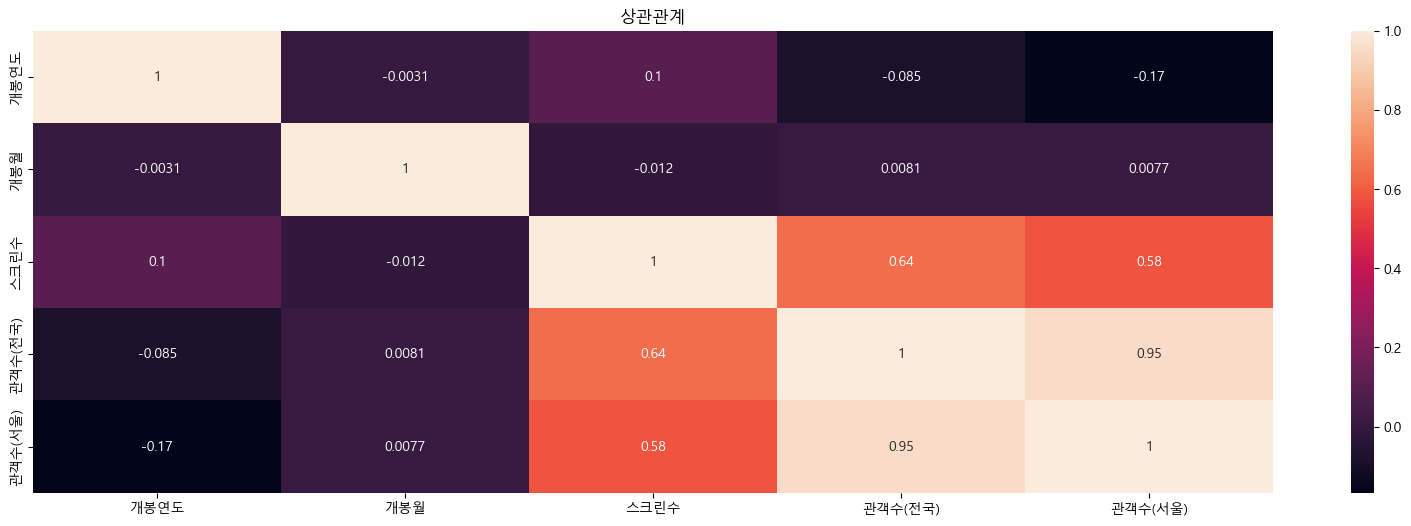

In [481]:
plt.figure(figsize=(20,6))
plt.title('상관관계')
sns.heatmap(movie.corr(),annot=True)

In [482]:
# 당연한 결과로 스크린수가 많으면 관객수도 많고, 월과 연도는 관객수와 관련이 없다.
# 개봉연도, 개봉월도 관객수에 관련이 없다

In [483]:
### 흥행확인

C:\Users\jkh75\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='흥행', ylabel='count'>

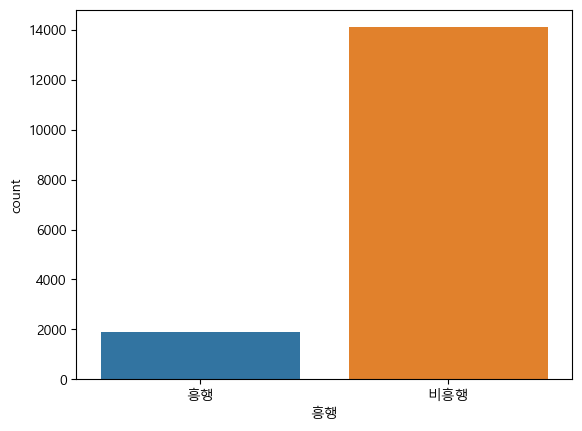

In [484]:
sns.countplot(movie['흥행'])

<AxesSubplot:xlabel='개봉연도', ylabel='count'>

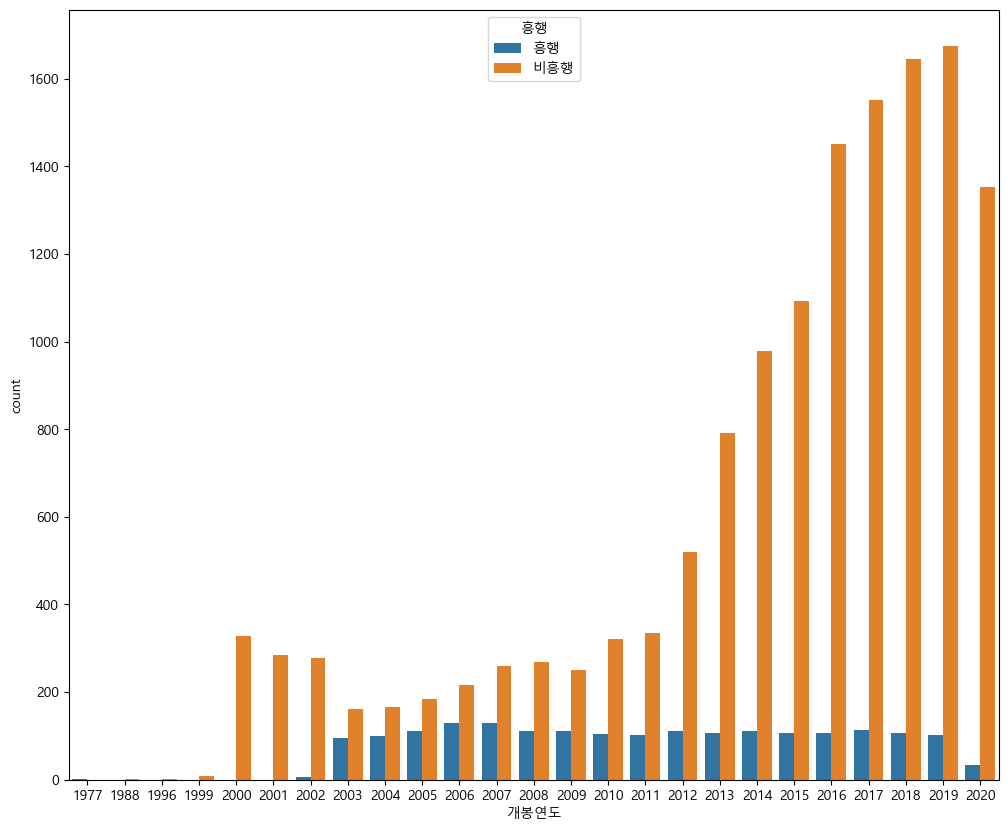

In [485]:
plt.figure(figsize=(12,10))
sns.countplot(x=movie['개봉연도'], hue=movie['흥행'])

<AxesSubplot:>

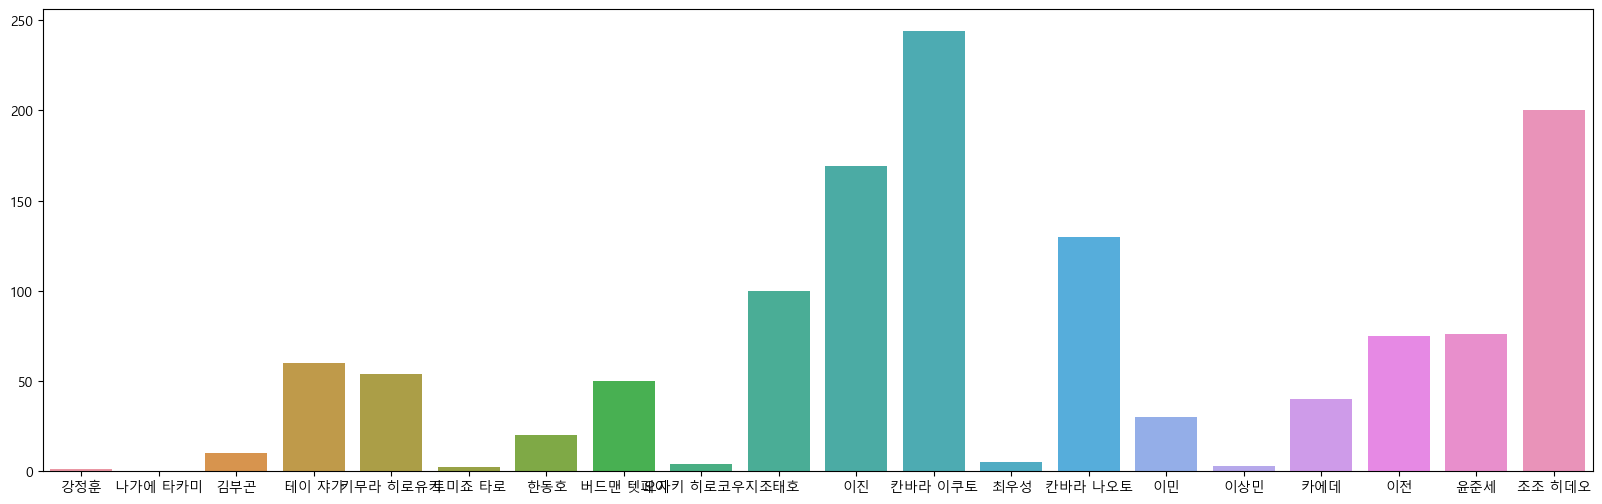

In [486]:
plt.figure(figsize=(20,6))
sns.barplot(x = movie['감독'].value_counts().index[:20],y = movie['관객수(전국)'].value_counts().index[:20])

In [487]:
# 흥행한 영화 상위10 감독, 작품수

In [488]:
director = movie[['감독','흥행']]
director_df = director[director['흥행'] == '흥행'].value_counts()[:10].to_frame()

In [489]:
#director = movie[['감독','흥행']]
#director_df = director.value_counts().to_frame()
director_df = director_df.reset_index()
director_df.rename(columns={0:'작품수'},inplace=True)
director_df

,감독,흥행,작품수
0,이준익,흥행,12
1,유야마 쿠니히코,흥행,10
2,리들리 스콧,흥행,9
3,강우석,흥행,8
4,크리스토퍼 놀란,흥행,8
5,류승완,흥행,8
6,장진,흥행,8
7,피터 잭슨,흥행,7
8,데이빗 예이츠,흥행,7
9,팀 버튼,흥행,7


In [490]:
# 특정 감독들의 다수의 작품이 흥행이 됬다는 걸 볼수 있다.

<AxesSubplot:xlabel='감독', ylabel='작품수'>

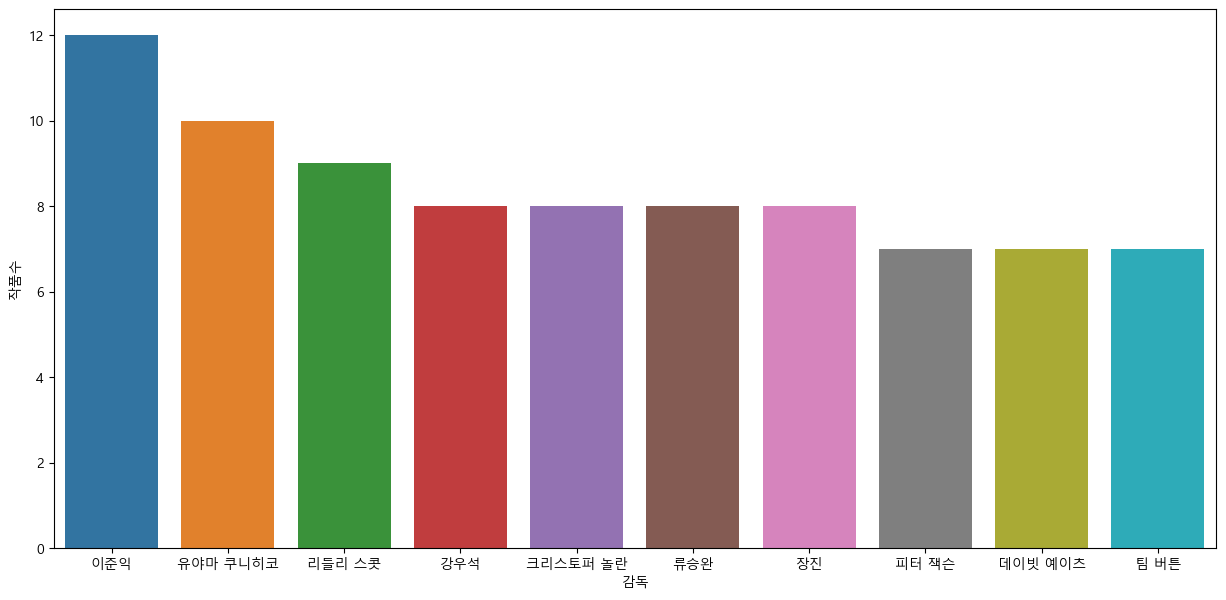

In [491]:
plt.figure(figsize = (15,7))
sns.barplot(x = director_df['감독'], y = director_df['작품수'])

In [492]:
# 드라마, 코미디, 액션, 애니메이션이 흥행을 했지만 비흥행도 높은 수치를 나타내고 있다. 그러므로 멜로, 드라마, 액션, 코미디, 성인물 장르의
# 작품들이 많이 제작되고 있다.

C:\Users\jkh75\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='장르', ylabel='count'>

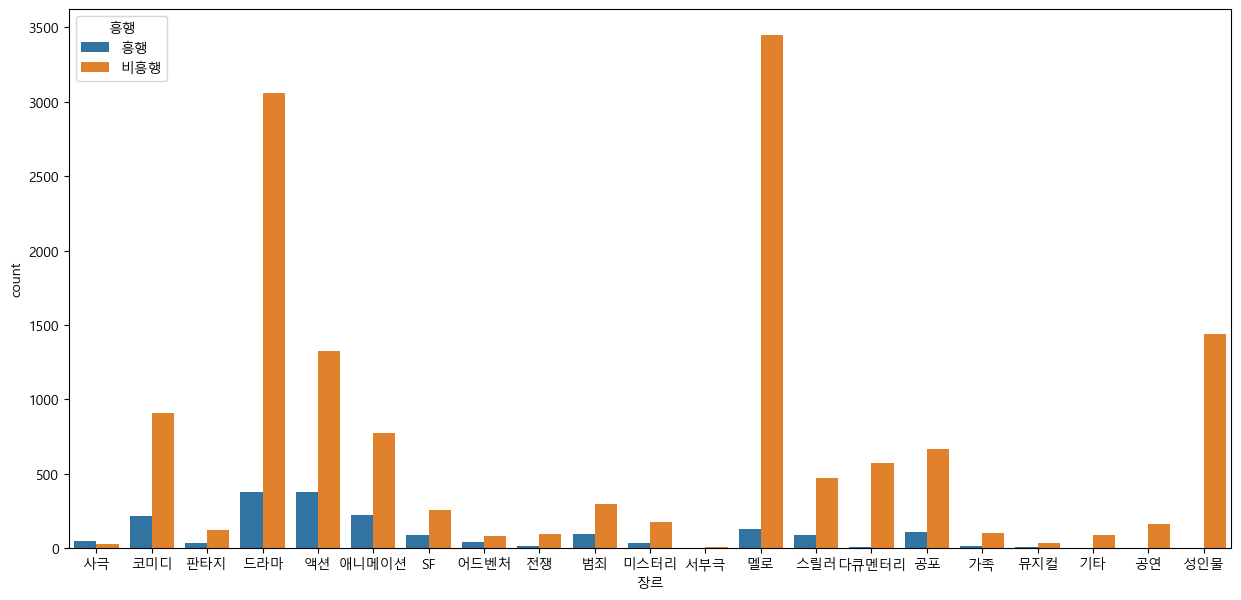

In [493]:
plt.figure(figsize=(15,7))
sns.countplot(movie['장르'], hue = movie['흥행'])

In [494]:
# 15세 관람가가 흥행을 더 많이 했지만, 전체 관람가보다 12세 관람가 관객수가 많은걸 볼수있다.

C:\Users\jkh75\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jkh75\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


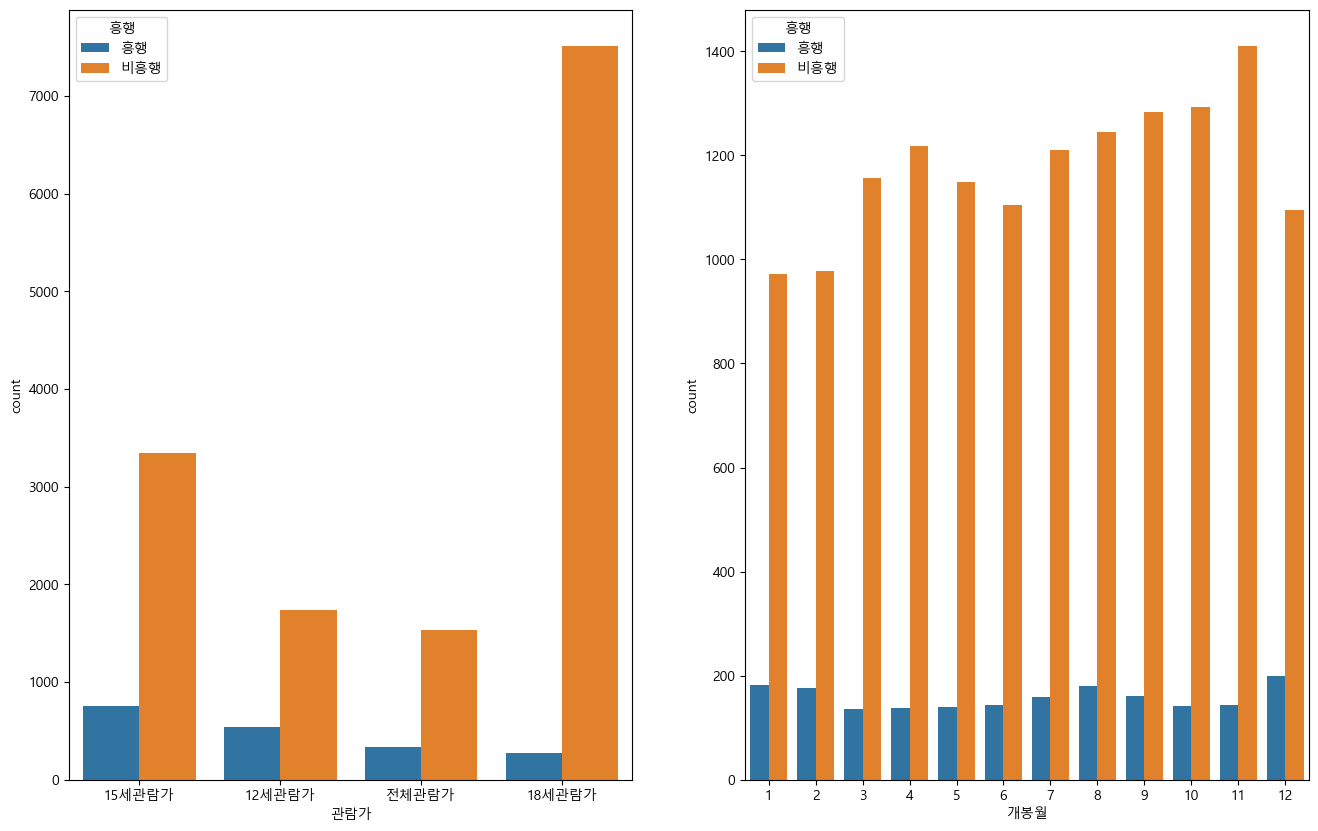

In [495]:
fig,ax = plt.subplots(ncols=2,figsize=(16,10)) 
sns.countplot(movie['관람가'], hue = movie['흥행'],ax=ax[0])
sns.countplot(movie['개봉월'], hue = movie['흥행'],ax=ax[1])
pass

In [496]:
# 파이 그래프와 바그래프를 비교하였을때 18세 관람가 영화는 48.6%센트로 많이 제작되지만 관객수가 많지는 않다. 하지만, 15세 관람가는 25.5%에
# 비해 흥행수치가 높다는걸 볼수 있다.

<AxesSubplot:xlabel='관람가', ylabel='관객수(전국)'>

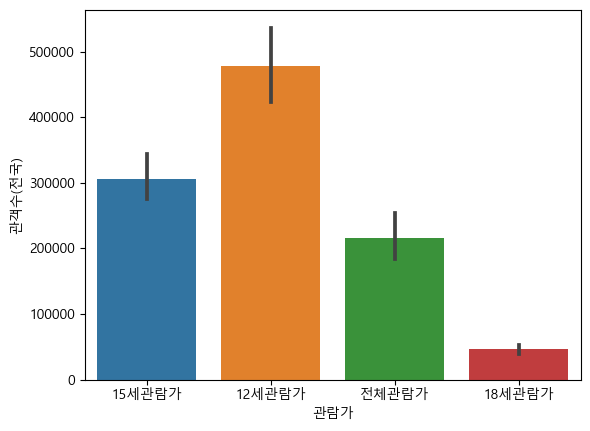

In [497]:
sns.barplot(x=movie['관람가'],y=movie['관객수(전국)'])

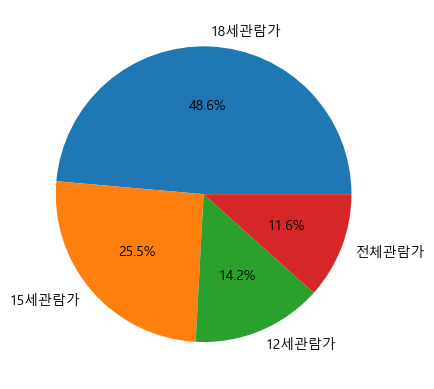

In [498]:
plt.pie(movie['관람가'].value_counts(), labels = movie['관람가'].value_counts().index, autopct="%.1f%%")
pass